In [290]:
from matplotlib import pyplot as plt
import numpy as np
import os
from imageio.v2 import imread
import cv2


from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import closing, footprint_rectangle
from skimage.color import label2rgb

In [291]:
def cargar_img(dir_imgs):

    """
    dir_imgs : directorio donde esten las imagenes 
    imgages_path : path especifico de cada imagen en un array de numpy
    """
    
    images_path = os.listdir(dir_imgs)
    images_path = np.array(images_path) 

    data = []
    for image in range(len(images_path)):
        data.append(imread(dir_imgs+images_path[image]))
        
    return np.array(data)

In [292]:
def applied_mask(data):

    """
    data : array de las imagenes de las galaxias
    binary : regresa los binarios donde este la mayor
    """
    binary = []
    
    for image in data:
        gray_img = rgb2gray(image)
        thresh = threshold_otsu(gray_img)
        mask = gray_img > (thresh * 0.99)

        applied_mask = np.zeros_like(image)
        
        for i in range(3):
            band = image[:, :, i]
            applied_mask[:, :, i] = mask * band

        binary.append(applied_mask)
    
    return binary 

In [303]:
def crop_galaxy(img, factor=1.5):
    """
    Recorta la galaxia centrada en una imagen RGB usando umbral adaptativo.
    img : ndarray
        Imagen RGB o en escala de grises con la galaxia centrada.
        Multiplicador del tamaño de la galaxia para dejar margen (1.5 por defecto).
        
    recorte : ndarray
        Subimagen recortada alrededor de la galaxia.
    """
    # Convertir a escala de grises si es RGB
    if img.ndim == 3:
        gray = rgb2gray(img)
    else:
        gray = img
    thresh = threshold_otsu(gray)
    binary = gray > thresh

    label_img = label(binary)

    if label_img.max() == 0:
        return img

    largest = max(regionprops(label_img), key=lambda r: r.area)
    minr, minc, maxr, maxc = largest.bbox


    cy, cx = (minr + maxr) // 2, (minc + maxc) // 2
    size = int(max(maxr - minr, maxc - minc) * factor)


    half = size // 2
    starty, endy = max(cy - half, 0), min(cy + half, img.shape[0])
    startx, endx = max(cx - half, 0), min(cx + half, img.shape[1])

    recorte = img[starty:endy, startx:endx]

    return recorte


In [308]:
path = "./images/images_mini/"
data = cargar_img(path)
binary = applied_mask(data) # mascara aplicada
croped_galaxie = crop_galaxy(data[0])

(-0.5, 157.5, 157.5, -0.5)

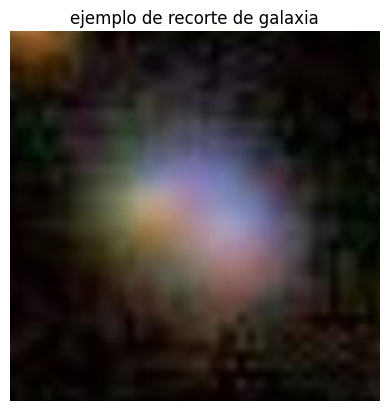

In [312]:
plt.title("ejemplo de recorte de galaxia")
plt.imshow(croped_galaxie)
plt.axis("off")

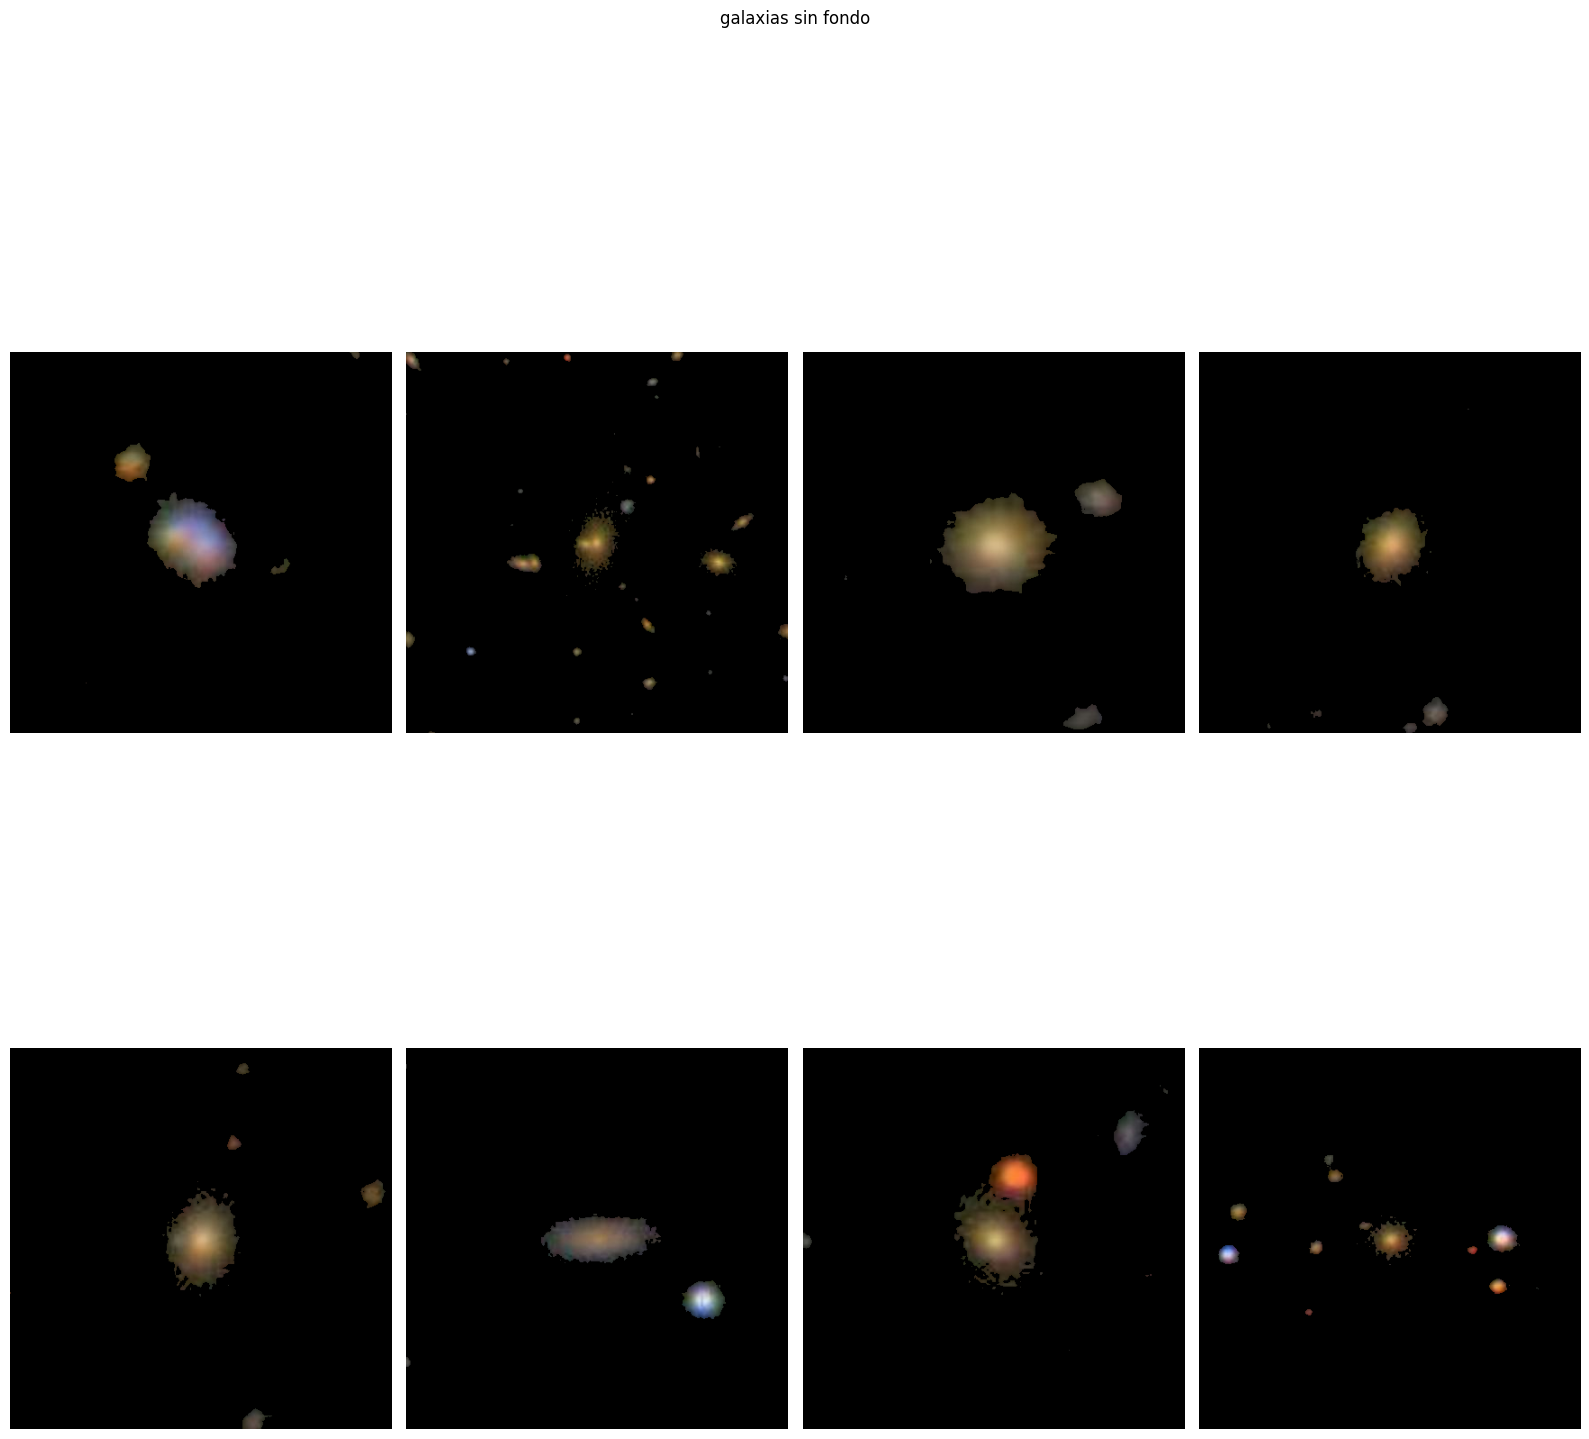

In [331]:
fig, axes = plt.subplots(2,4, figsize=(16,18), tight_layout=True)
for i, ax in enumerate(axes.flat):
    ax.imshow(binary[i])
    ax.axis('off')
fig.suptitle("galaxias sin fondo")
plt.show()